In [1]:
import qiskit.tools.jupyter
from qiskit import QuantumCircuit, QuantumRegister, execute, Aer, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator

#%qiskit_version_table



In [2]:
simulator = AerSimulator()


In [60]:
def encode(number):
    qr = QuantumRegister(1, "number")
    qc = QuantumCircuit(qr)
    if (number == 1):
        qc.x(qr[0])
    return qc

def bit_compare():
    qr = QuantumRegister(2, "bits")
    aux = QuantumRegister(2, "aux")
    
    qc = QuantumCircuit(qr, aux)
    qc.x(qr[1])
    qc.mcx(qr, aux[0])
    qc.x(qr[0])
    qc.x(qr[1])
    qc.mcx(qr, aux[1])
    qc.x(qr[0])
    
    return qc



    #qc.x(qr[0])
    #qc.x(qr[1])
    #qc.mcx(qr, aux[1])
    #qc.x(qr[0])

    #qc.measure([aux[0],aux[1]], [cr[0],cr[1]])
    qc.measure([aux[0]], [cr[0]])
    

    return qc

def compare(a, b):
    qra = QuantumRegister(1, "a")
    qrb = QuantumRegister(1, "b")
    qraux = QuantumRegister(2, "aux")

    qc = QuantumCircuit(qra, qrb, qraux)

    qc.append(encode(a), [*qra])
    qc.append(encode(b), [*qrb])

    qc.append(bit_compare(), [*qra, *qrb, *qraux])

    # Tell Qiskit how to simulate our circuit
    backend = Aer.get_backend('statevector_simulator') 

    # Do the simulation, returning the result
    result = execute(qc,backend, shots=1000).result()

    # get the probability distribution
    counts = result.get_counts()
    
    return counts, qc

# measure on classical register , if true, will add classical register automatically
#qc.measure_all(add_bits=False)
# measure qubit of a registre to a cbit in circruit

#qc_bc.draw()

counts, qc = compare(1,0)
counts

{'0101': 1.0}

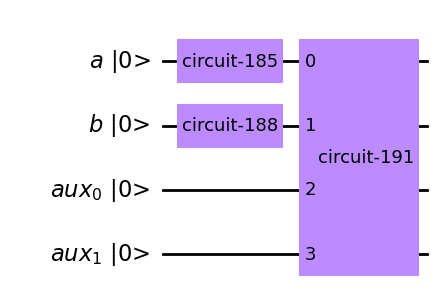

In [61]:
qc.draw(initial_state=True)

In [56]:
# do unit test logic
# aux0 == 1 if b0 > b1
# aux1 == 1 if b1 > b0
# aux1 and aux0 == 0 if b1==b0
in_cbits = '11'
counts, qc_bc = simulate(in_cbits, func=bit_compare)
if in_cbits == '10':
    assert counts.get('00',None) is not None
if in_cbits == '11':
    assert counts.get('01',None) is not None
counts

TypeError: bit_compare() takes 0 positional arguments but 1 was given

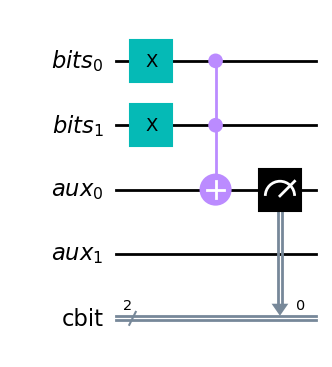

In [52]:
qc_bc.draw()


Total count for 0 and 1 are: {'01': 1000}


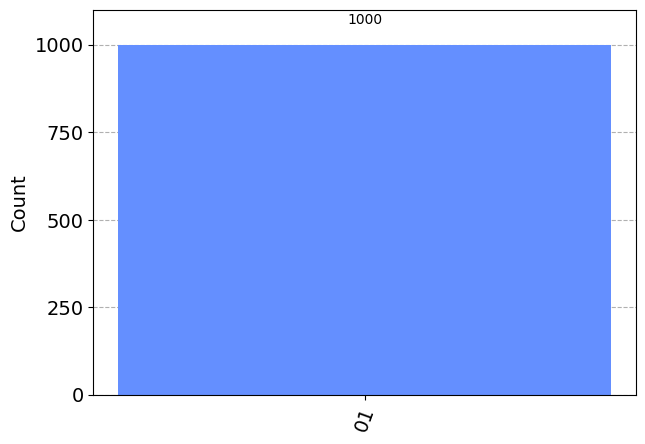

In [53]:
job = execute(qc_bc,simulator,shots = 1000)
result = job.result()
counts = result.get_counts(qc_bc)
print("\nTotal count for 0 and 1 are:",counts)
plot_histogram(counts)